In [1]:
import math

from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp
from numpy import sqrt
from sympy.parsing.sympy_parser import parse_expr

import readcode
import symbols
import genetic_operations

%matplotlib inline

Najrpv si vygenerujeme dáta, ktoré budeme chcieť fitnúť. Bude to normálna distribúcia.

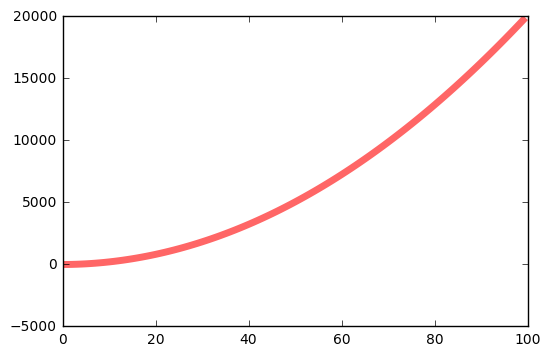

In [2]:
def target_func(x):
    return 2*x**2 + x - 5

fig, ax = plt.subplots(1,1)
x = np.arange(0, 100, 1)
ax.plot(x, target_func(x), 'r-', lw=5, alpha=0.6)

In [3]:
data = np.matrix([x, target_func(x)]).transpose()

Teraz si zadefinujeme MSE funkciu, ktorá nám pre dataset a nejakú funkciu vráti chybu. Toto bude funkcia, ktorú pôjdeme minimalizovať.

In [4]:
def mse(target, sug):
    return sum(np.abs((target - sug).A1))

Vytvoríme si náhodný strom, priradíme mu symboly, sparsujeme a vyhodnotíme jeho MSE.

In [5]:
def generate_expresion():
    tree = readcode.generate(3)
    tree_with_symbols = symbols.assign_symbols(tree)
    return tree_with_symbols

In [6]:
def candidate_solution_func(expr_str, x):
    return eval(readcode.parse(expr_str))

Už máme v podstate všetko potrebné, takže vygenerujeme 10 náhodných stromov, vyhodnotíme ich a zoradíme podľa fitness.

In [7]:
def eval_fintess_of_population(population):
    evalued = []
    for individual in population:
        try:
            X = candidate_solution_func(individual[0], data[:,0])
        except (ValueError, ZeroDivisionError) as ve:
            print(ve)
            continue
        
        error = mse(data[:,1], X)
        #print(readcode.parse(individual[0]), error)
        evalued.append((individual[0], error))
    evalued.sort(key=lambda x: x[1])
    return [x for x in evalued if float('-inf') < float(x[1]) < float('inf')]
    

Takze teraz mozeme spustit niekolko iteracii a sledovat, ci sa fitness bude zlepsovat alebo nie

In [14]:
population = [(generate_expresion(), None) for i in range(0,500)]
population = eval_fintess_of_population(population)

best = []

for i in range(0,100):
    avg_fitness = sum([x[1] for x in population])/len(population)
    best_fitness = min(population, key=lambda x: x[1])
    best.append(best_fitness[1])
    #print('%d - avg: %f, best: %f'%(i, avg_fitness, best_fitness[1]))
    
    population = genetic_operations.generate_new_population(population, 50)
    population = eval_fintess_of_population(population)
    

shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1

C:\Users\jarinov-notas\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
C:\Users\jarinov-notas\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\Users\jarinov-notas\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: invalid value encountered in less


shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)
shapes (100,1) and (100,1

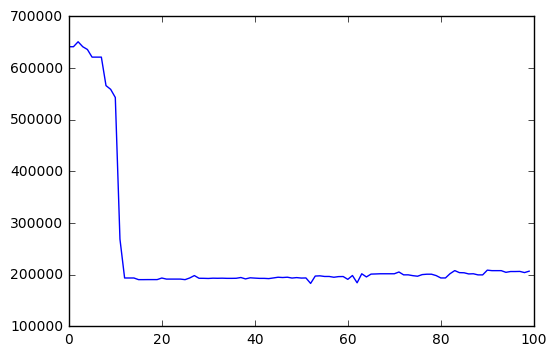

In [15]:
plt.plot(best)


In [16]:
parse_expr(readcode.parse(min(population, key=lambda x: x[1])[0]))

513*x/4 + 362

In [17]:
readcode.parse(min(population, key=lambda x: x[1])[0])

'((((((((((x))))+(((((x/4)+((((((x))))+((((3+((((x+((((x)))))))*3))+(((((((x))))))+2)))))+(1+2)))+((((((((((((((((((3))))))))+(((((((((x+4))))))))))+x)))*3)))))+((((3-4)+2))))))))+(((((3))))+x))+((((((((x-x)))))))+(((((x+(((((((x*4))))))))))))))+((((((((((x))))+((((((x)))))))+((((((((3-4)+2))))))))+(((((x+(((2+x)+4)+(((((((((2+2)))+((((x)))))+x)))*3)*3)))+((((((((x))))))+4)+((((x))))))))*3))+(((4*2)*4)+2)))))+(1+((((4))))))+(((x))+((x+(((((2+x)+4)+((((((((((x))))+((((((3)))))))+(((x-x))))+((((((((3))))+2)+(((x+4)*(((4*3))))+(2+2)))+(((((((3-1)+((((2)))))+((((((((2)))))))))+((((x+(((2+x)+4)+((((4+x)))*3)))))*3))+(((((x))))+((((((x)))))))))))+(1+2)))+(((((((((1))))))))+(((((x+4)-4)+2))))))))+(1+2))+(((x+4)*(((((3+1))))))+(((((x+((((((4))))))))))))))-((((4)))))))'

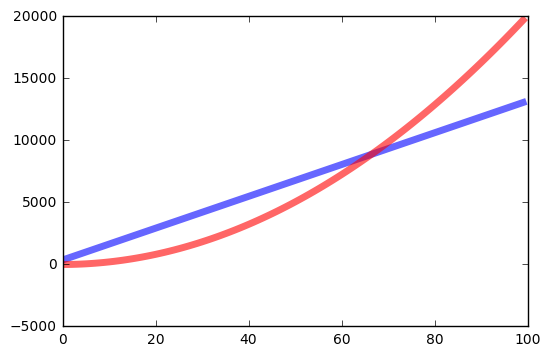

In [18]:
best_fitness = min(population, key=lambda x: x[1])
fig, ax = plt.subplots(1,1)
x = np.arange(0, 100, 1)
ax.plot(x, candidate_solution_func(best_fitness[0],x), 'b-', lw=5, alpha=0.6)
ax.plot(x, target_func(x), 'r-', lw=5, alpha=0.6)

In [ ]:
readcode.parse(best_fitness[0])

In [ ]:
readcode.generate(3)